# Machine Learning Toolkit (Regression)
## This program provides a tool used to do create a machine learning model on a given dataset.

## This one works with regression problems where the target label is a continous numerical value.

Take a dataset from Kaggle or from your own and upload it to this program: https://www.kaggle.com/datasets

In [1]:
import pandas as pd
import numpy as np
import sklearn as scikit_learn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import os
import joblib as joblib
from joblib import dump, load
import tkinter as tk
from tkinter import *
np.random.seed(1000)
rstate = 12

In [2]:
pip install mrmr_selection

Note: you may need to restart the kernel to use updated packages.


In [3]:
import mrmr
from mrmr import mrmr_classif

In [4]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [5]:
from skopt import BayesSearchCV

In [6]:
root = Tk()
root.geometry("600x10000")
root.config(bg="lightgrey")
  
w = Label(root, text ='ML Options (Click on Submit when finished)', font = "30") 
w.pack()
  
Checkbutton1 = IntVar(value=1)  
Checkbutton2 = IntVar(value=1)  
Checkbutton3 = IntVar(value=1)
Checkbutton4 = IntVar(value=0)
Checkbutton5 = IntVar(value=0)
Checkbutton6 = IntVar(value=0)
Checkbutton7 = IntVar(value=0)
  
Button1 = Checkbutton(root, text = "oneHotEncode", 
                      variable = Checkbutton1,
                      onvalue = 1,
                      offvalue = 0,
                      height = 2,
                      width = 10)
  
Button2 = Checkbutton(root, text = "Impute",
                      variable = Checkbutton2,
                      onvalue = 1,
                      offvalue = 0,
                      height = 2,
                      width = 10)
  
Button3 = Checkbutton(root, text = "cutMissingRows",
                      variable = Checkbutton3,
                      onvalue = 1,
                      offvalue = 0,
                      height = 2,
                      width = 10)  
Button4 = Checkbutton(root, text = "removeOutliars",
                      variable = Checkbutton4,
                      onvalue = 1,
                      offvalue = 0,
                      height = 2,
                      width = 10)  

Button5 = Checkbutton(root, text = "Scaling",
                      variable = Checkbutton5,
                      onvalue = 1,
                      offvalue = 0,
                      height = 2,
                      width = 10)  

Button6 = Checkbutton(root, text = "QuantileTr.",
                      variable = Checkbutton6,
                      onvalue = 1,
                      offvalue = 0,
                      height = 2,
                      width = 10)  

Button7 = Checkbutton(root, text = "Normalize",
                      variable = Checkbutton7,
                      onvalue = 1,
                      offvalue = 0,
                      height = 2,
                      width = 10)  

Button7 = Checkbutton(root, text = "Normalize",
                      variable = Checkbutton7,
                      onvalue = 1,
                      offvalue = 0,
                      height = 2,
                      width = 10) 
    

# File Name label and entry widgets
Label(root, text="File Name (Do not inlcude .csv or other tags)", bg="lightgrey").pack()
Label(root, text="Be aware that some datasets may not work well with certian models", bg="lightgrey").pack()
filename = Entry(root, bd=2)
filename.insert(0, "train")
filename.pack()

# File Type and dropdown widgets
file_type = StringVar(root)
file_type.set("Select a File Type")
filetype_menu = OptionMenu(root, file_type,'csv','excel')
filetype_menu.pack()
   
Button1.pack() # OneHotEncode

Button2.pack() # Impute 

Button3.pack() # cut Missing Rows

Button4.pack() # remove Outlairs

Label(root, text="(Only if you chose remove outliers)", bg="lightgrey").pack()
Label(root, text="Remove Outliars Threshold", bg="lightgrey").pack()
Threshold = Entry(root, bd=2)
Threshold.insert(0, "0")
Threshold.pack()
#threshold = Threshold.get()

# Note at some Scaling Methods may not work with some models
Label(root, text="Note at some Scaling Methods may not be compatible with some models", bg="lightgrey").pack()
Button5.pack() # Scaling

# Scaling Type and dropdown widgets
Label(root, text="(Only if you chose Scaling)", bg="lightgrey").pack()
scale_type = StringVar(root)
scale_type.set("Select a Scaling Type")
scale_type_menu = OptionMenu(root, scale_type,'MinMaxScaler','RobustScaler','MaxAbsScaler','StandardScaler')
scale_type_menu.pack()

Button6.pack() # Quantile

Button7.pack() # Normalize

def getInput():
    
    global file_name
    file_name = filename.get()
    global filetype
    filetype = file_type.get()
    global OneHotEncode
    OneHotEncode = Checkbutton1.get()
    global Impute
    Impute = Checkbutton2.get()
    global cutMissingRows
    cutMissingRows = Checkbutton3.get()
    global removeOutlairs
    removeOutlairs = Checkbutton4.get()
    global threshold
    threshold = Threshold.get()
    global Scaling
    Scaling = Checkbutton5.get()
    global scaletype
    scaletype = scale_type.get()
    global Quantile
    Quantile = Checkbutton6.get()
    global Normalize
    Normalize = Checkbutton7.get()
    root.destroy()
    
#Sumbit values
Button(root, text = "submit",
           command = getInput).pack() 

mainloop() 

In [7]:
print(file_name)
print(filetype)
print(OneHotEncode)
print(Impute)
print(cutMissingRows)
print(removeOutlairs)
print(threshold)
print(Scaling)
print(scaletype)
print(Quantile)
print(Normalize)

sales_data
csv
1
1
0
0
0
0
Select a Scaling Type
0
0


In [8]:
root = Tk()
root.geometry("600x800")
root.config(bg="lightgrey")
  
x = Label(root, text ='ML Options 2 (Click on Submit when finished)', font = "30") 
x.pack()

Checkbutton9 = IntVar(value=0)

Button9 = Checkbutton(root, text = "FeatureSelection",
                      variable = Checkbutton9,
                      onvalue = 1,
                      offvalue = 0,
                      height = 2,
                      width = 10) 

Button9.pack() # FeatureSelection

# Feature Selection Type and dropdown widgets
Label(root, text="(Only if you chose FeatureSelection)", bg="lightgrey").pack()
featureselection_type = StringVar(root)
featureselection_type.set("Select a Feature Selection Type")
featureselection_type_menu = OptionMenu(root, featureselection_type,'MRMR','SelectKBest','SelectPercentile','VarianceThreshold')
featureselection_type_menu.pack()

# Feature Selection Type 2 and dropdown widgets
Label(root, text="(Only if you chose SelectKBest or SelectPercentile)", bg="lightgrey").pack()
featureselection_type2 = StringVar(root)
featureselection_type2.set("Select a 2nd Feature Selection Type")
featureselection_type2_menu = OptionMenu(root, featureselection_type2,'f_classif','chi2')
featureselection_type2_menu.pack()

# N_features label and entry widgets
Label(root, text="# of features (Oly if you chose FeatureSelection)", bg="lightgrey").pack()
features = Entry(root, bd=2)
features.insert(0, "20")
features.pack()

# Hyper. Tune Strategy and dropdown widgets
strategy_type = StringVar(root)
strategy_type.set("Select a Hyper. Tune Strategy")
strategy_type_menu = OptionMenu(root, strategy_type,'random','bayesian','grid')
strategy_type_menu.pack()

# Hyper. Tune Num. Itr label and entry widgets
Label(root, text="Hyper. Tune # of Itr", bg="lightgrey").pack()
itr = Entry(root, bd=2)
itr.insert(0, "20")
itr.pack() 
#n_itr = itr.get()

# first feature label and entry widgets
Label(root, text="First feature name.", bg="lightgrey").pack()
firstFeature = Entry(root, bd=2)
firstFeature.pack() 

# last feature label and entry widgets
Label(root, text="Last feature name.", bg="lightgrey").pack()
lastFeature = Entry(root, bd=2)
lastFeature.pack() 

# Final Label label and entry widgets
Label(root, text="Label Name.", bg="lightgrey").pack()
final_label = Entry(root, bd=2)
final_label.pack() 

def getInput():
    
    global strategytype
    strategytype = strategy_type.get()
    global n_itr
    n_itr = itr.get()
    global first_Feature
    first_Feature = firstFeature.get()
    global last_Feature
    last_Feature = lastFeature.get()
    global output_label
    output_label = final_label.get()
    global FeatureSelection
    FeatureSelection = Checkbutton9.get()
    global featureselectiontype
    featureselectiontype = featureselection_type.get()
    global featureselectiontype2
    featureselectiontype2 = featureselection_type2.get()
    global n_features
    n_features = features.get()
    root.destroy()
    
#Sumbit values
Button(root, text = "submit",
           command = getInput).pack() 
  
mainloop() 

In [9]:
print(strategytype)
print(n_itr)
print(first_Feature)
print(last_Feature)
print(output_label)
print(FeatureSelection)
print(featureselectiontype)
print(featureselectiontype2)
print(n_features)

random
20
MSSubClass
SaleCondition
SalePrice
0
Select a Feature Selection Type
Select a 2nd Feature Selection Type
20


In [10]:
root = Tk()
root.geometry("600x1000")
root.config(bg="lightgrey")
  
y = Label(root, text ='ML Algorithims to Use (Must have at least 1)', font = "30") 
y.pack()
 
Checkbutton11 = IntVar(value=1)
Checkbutton12 = IntVar(value=0)
Checkbutton13 = IntVar(value=0)
Checkbutton14 = IntVar(value=0)
Checkbutton15 = IntVar(value=0)
Checkbutton16 = IntVar(value=0)
Checkbutton17 = IntVar(value=0)
Checkbutton18 = IntVar(value=0)
Checkbutton19 = IntVar(value=0)
Checkbutton20 = IntVar(value=0)
Checkbutton21 = IntVar(value=0)
Checkbutton22 = IntVar(value=0)
Checkbutton23 = IntVar(value=0)
Checkbutton24 = IntVar(value=0)
  
Button11 = Checkbutton(root, text = "Random Forest", 
                      variable = Checkbutton11,
                      onvalue = 1,
                      offvalue = 0,
                      height = 2,
                      width = 10)
Button12 = Checkbutton(root, text = "RidgeCV", 
                      variable = Checkbutton12,
                      onvalue = 1,
                      offvalue = 0,
                      height = 2,
                      width = 10)
Button13 = Checkbutton(root, text = "Lasso", 
                      variable = Checkbutton13,
                      onvalue = 1,
                      offvalue = 0,
                      height = 2,
                      width = 10)
Button14 = Checkbutton(root, text = "SGD Elastic", 
                      variable = Checkbutton14,
                      onvalue = 1,
                      offvalue = 0,
                      height = 2,
                      width = 10)
Button15 = Checkbutton(root, text = "SGD", 
                      variable = Checkbutton15,
                      onvalue = 1,
                      offvalue = 0,
                      height = 2,
                      width = 10)
Button16 = Checkbutton(root, text = "Ridge", 
                      variable = Checkbutton16,
                      onvalue = 1,
                      offvalue = 0,
                      height = 2,
                      width = 10)
Button17 = Checkbutton(root, text = "Linear Reg.", 
                      variable = Checkbutton17,
                      onvalue = 1,
                      offvalue = 0,
                      height = 2,
                      width = 10)
Button18 = Checkbutton(root, text = "Descision Tree", 
                      variable = Checkbutton18,
                      onvalue = 1,
                      offvalue = 0,
                      height = 2,
                      width = 10)
Button19 = Checkbutton(root, text = "ElasticNet", 
                      variable = Checkbutton19,
                      onvalue = 1,
                      offvalue = 0,
                      height = 2,
                      width = 10)
Button20 = Checkbutton(root, text = "LinearSVR", 
                      variable = Checkbutton20,
                      onvalue = 1,
                      offvalue = 0,
                      height = 2,
                      width = 10)
Button21 = Checkbutton(root, text = "KNearest N.", 
                      variable = Checkbutton21,
                      onvalue = 1,
                      offvalue = 0,
                      height = 2,
                      width = 10)
Button22 = Checkbutton(root, text = "ElasticNetCV", 
                      variable = Checkbutton22,
                      onvalue = 1,
                      offvalue = 0,
                      height = 2,
                      width = 10)
Button23 = Checkbutton(root, text = "ARDRegression", 
                      variable = Checkbutton23,
                      onvalue = 1,
                      offvalue = 0,
                      height = 2,
                      width = 10)
Button24 = Checkbutton(root, text = "SVR", 
                      variable = Checkbutton24,
                      onvalue = 1,
                      offvalue = 0,
                      height = 2,
                      width = 10)


Button11.pack() # rf
Button12.pack() # RidgeCV
Button13.pack() # Lasso
Button14.pack() # sgd_elastic
Button15.pack() # sgd
Button16.pack() # Ridge
Button17.pack() # lr
Button18.pack() # dt
Button19.pack() # ElasticNet
Button20.pack() # LinearSVR
Button21.pack() # knn
Button22.pack() # ElasticNetCV
Button23.pack() # ARDRegression
Button24.pack() # SVR


def getInput():
    
    global algorithms
    algorithms = []
    
    rf = Checkbutton11.get()
    if rf == 1:
        algorithms.append("rf")
    RidgeCV = Checkbutton12.get()
    if RidgeCV == 1:
        algorithms.append("RidgeCV")
    Lasso = Checkbutton13.get()
    if Lasso == 1:
        algorithms.append("Lasso")
    sgd_elastic = Checkbutton14.get()
    if sgd_elastic == 1:
        algorithms.append("SGDRegressor_elasticnet")
    sgd = Checkbutton15.get()
    if sgd == 1:
        algorithms.append("SGDRegressor")
    ridge = Checkbutton16.get()
    if ridge == 1:
        algorithms.append("ridge")
    lr = Checkbutton17.get()
    if lr == 1:
        algorithms.append("LinearRegression")
    dt = Checkbutton18.get()
    if dt == 1:
        algorithms.append("dt")
    ElasticNet = Checkbutton19.get()
    if ElasticNet == 1:
        algorithms.append("ElasticNet")
    LinearSVR = Checkbutton20.get()
    if LinearSVR == 1:
        algorithms.append("LinearSVR")
    knn = Checkbutton21.get()
    if knn == 1:
        algorithms.append("knn")
    ElasticNetCV = Checkbutton22.get()
    if ElasticNetCV == 1:
        algorithms.append("ElasticNetCV")
    ARDRegression = Checkbutton23.get()
    if ARDRegression == 1:
        algorithms.append("ARDRegression")
    SVR = Checkbutton24.get()
    if SVR == 1:
        algorithms.append("SVR")
    
    root.destroy()
    
#Sumbit values
Button(root, text = "submit",
           command = getInput).pack() 
  
mainloop() 

In [11]:
print(algorithms)

options = {
    'oneHotEncode' : True if OneHotEncode == 1 else False, 
    'Impute': True if Impute == 1 else False, 
    'cutMissingRows' : True if cutMissingRows == 1 else False,
    'removeBig': True if removeOutlairs == 1 else False, 
    'removeBig_N': int(threshold), 
    'Scaling': True if Scaling == 1 else False, 
    'scalingMethod': scaletype, 
    'QuantileTransformer':True if Quantile == 1 else False, 
    'Normalize':True if Normalize == 1 else False,
    'FeatureSelection': True if FeatureSelection == 1 else False,
    'method': featureselectiontype, 
    "type": featureselectiontype2, 
    'N_features': int(n_features), 
    'per':10,
    'strategy': strategytype, 
    'itr': int(n_itr)
}

with open("parameter_setup.txt", 'w') as f: 
    f.write('Data Set Name: %s\n' % file_name)
    f.write('ML Alogorithims: %s\n' % algorithms)
    for key, value in options.items(): 
        f.write('%s:%s\n' % (key, value))
f.close()

['rf', 'RidgeCV', 'Lasso', 'SGDRegressor_elasticnet', 'SGDRegressor', 'ridge', 'LinearRegression', 'dt', 'ElasticNet', 'LinearSVR', 'knn', 'ElasticNetCV', 'ARDRegression', 'SVR']


In [12]:
filename = file_name

if filetype == 'csv':
    #filename = filename + ".csv"
    raw_df = pd.read_csv(filename + ".csv" )
elif filetype == 'excel':
    #filename = filename + ".xlsx"
    raw_df = pd.read_excel(filename + ".xlsx")
else:
    #filename = filename + ".csv"
    raw_df = pd.read_csv(filename + ".csv" )

In [13]:
df = raw_df.copy()

In [14]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [15]:
# By default, we should cut rows that have missing series of values (cutMissing), impute the data (Impute), and remove very large data values (removeBig)
def preprocess(df, input_cols, label_cols, numeric_cols, categorical_cols, Impute=True, cutMissingRows=True, oneHotEncode=True, removeBig=False, N=20000, Scaling=False, scalingMethod='MinMaxScaler', QuantileTransformer=False, Normalize=False):
    if oneHotEncode == True:
        print("oneHotEncode")
        # One Hot Encode catagorical variables
        from sklearn.preprocessing import OneHotEncoder
        encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
        encoder.fit(raw_df[categorical_cols])
        encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
        df[encoded_cols] = encoder.transform(df[categorical_cols])
        input_cols = numeric_cols + encoded_cols
    
    if Impute == True:
        print("Impute")
        # Impute the remaining missing numeric data
        from sklearn.impute import SimpleImputer
        imputer = SimpleImputer(strategy = 'mean')
        imputer.fit(df[numeric_cols])
        df[numeric_cols] = imputer.transform(df[numeric_cols])
        
    if cutMissingRows == True:
        print("cutMissingRows")
        # Drop rows with missing values
        df = df.dropna()
    
    if removeBig == True:
        print("removeBig")
        # Remove rows that have a value greater than N for any column. Default N is 20000
        for column  in df[numeric_cols]:
            df = df.drop(df.index[df[column] > N])
    
    if Scaling == True:
        print("Scaling")
        # Scaling the input features for a chosen method. Default is MinMaxScaler.
        if scalingMethod == 'MinMaxScaler': 
            print("MinMaxScaler")
            # This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
            from sklearn.preprocessing import MinMaxScaler
            scaler = MinMaxScaler()
        elif scalingMethod == 'RobustScaler':
            print("RobustScaler")
            # This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).
            from sklearn.preprocessing import RobustScaler
            scaler = RobustScaler()
        elif scalingMethod == 'MaxAbsScaler':
            print("MaxAbsScaler")
            # Scale each feature by its maximum absolute value.
            from sklearn.preprocessing import MaxAbsScaler
            scaler = MaxAbsScaler()
        elif scalingMethod == 'StandardScaler':
            print("StandardScaler")
            # Standardize features by removing the mean and scaling to unit variance.
            from sklearn.preprocessing import StandardScaler
            scaler = StandardScaler()
        scaler.fit(df[numeric_cols])
        df[numeric_cols] = scaler.transform(df[numeric_cols])
        
    if QuantileTransformer == True:  
        print("QuantileTransformer")
        # transforms the features to follow a uniform or a normal distribution.
        from sklearn.preprocessing import QuantileTransformer
        qt = QuantileTransformer(output_distribution='normal').fit(df[numeric_cols])
        df[numeric_cols] = qt.transform(df[numeric_cols])
        
    if Normalize == True:  
        print("Normalize")
        # Normalize the data
        from sklearn.preprocessing import Normalizer
        normalizer = Normalizer().fit(df[numeric_cols])
        df[numeric_cols] = normalizer.transform(df[numeric_cols])
        
    
    return df, input_cols

In [16]:
# Split data into input and output sets
def split(df, input_cols, label_cols):
    input_df = df[input_cols].copy()
    output_df = df[label_cols].copy()
    
    return input_df, output_df

In [17]:
#rebalance the imbalanced data with a chosen label
def rebalance(input_df, label_df, type='RandomUnderSampler'):
    if type == 'RandomUnderSampler':
        # random undersampling reduces the number of majority class randomly down to the desired ratio against the minority class.
        from imblearn.under_sampling import RandomUnderSampler
        rebalance = RandomUnderSampler()
        input_df2, label_df2 = rebalance.fit_resample(input_df, label_df)
    elif type == 'RandomOverSampler':
        # Naive random over-sampling.
        from imblearn.over_sampling import RandomOverSampler
        rebalance = RandomOverSampler()
        input_df2, label_df2 = rebalance.fit_resample(input_df, label_df)
    elif type == 'SMOTE':
        # SMOTE is a technique to up-sample the minority classes while avoiding overfitting.
        from imblearn.over_sampling import SMOTE
        rebalance = SMOTE()
        input_df2, label_df2 = rebalance.fit_resample(input_df, label_df)    
    elif type == 'ADASYN':
        # Adaptive Synthetic (ADASYN) algorithm. This method is similar to SMOTE but it generates different number of samples depending on an estimate of the local distribution of the class to be oversampled.
        from imblearn.over_sampling import ADASYN
        rebalance = ADASYN()
        input_df2, label_df2 = rebalance.fit_resample(input_df, label_df)                   
    else:
        print("Cannot do")
        input_df2, label_df2 = input_df, label_df
        
    return input_df2, label_df2  

In [18]:
def feature_selection(input_df, output_df, method="MRMR", type='f_classif', N=20, per=10):
    if method=="MRMR":
        selected_features = mrmr_classif(X=input_df, y=output_df, K=N)
        input_df_new = input_df[selected_features]
    elif method=="SelectKBest":
        if type=='f_classif':
            best_features =  SelectKBest(f_classif, k=N)
            best_features.fit(input_df, output_df)
        elif type=='chi2':
            best_features =  SelectKBest(chi2, k=N)
            best_features.fit(input_df, output_df)
        # Get columns to keep and create new dataframe with those only
        cols_idxs = best_features.get_support(indices=True)
        input_df_new = input_df.iloc[:,cols_idxs]
    elif method=="SelectPercentile": # Select features according to a percentile of the highest scores.
        if type=='f_classif':
            best_features =  SelectPercentile(f_classif, percentile=per)
            best_features.fit(input_df, output_df)
        elif type=='chi2':
            best_features =  SelectPercentile(chi2, percentile=per)
            best_features.fit(input_df, output_df)
        # Get columns to keep and create new dataframe with those only
        cols_idxs = best_features.get_support(indices=True)
        input_df_new = input_df.iloc[:,cols_idxs]
    elif method=="VarianceThreshold": # Feature selector that removes all low-variance features.
        best_features = VarianceThreshold()
        best_features.fit(input_df)
        cols_idxs = best_features.get_support(indices=True)
        input_df_new = input_df.iloc[:,cols_idxs]
    
    return input_df_new, list(input_df_new.columns)

In [19]:
# define a model to use and its set of parameters
def get_classifier(alg):
    est_rs = 1000
    if alg == 'rf':
        from sklearn.ensemble import RandomForestRegressor
        estimator = RandomForestRegressor(random_state=est_rs)
        param_vals = {'max_depth': [10, 20, 30, 50, 100, 150, 200], 'n_estimators': [20, 30, 50, 70, 100, 120], 'max_leaf_nodes': [10, 20, 30, 40],
                      'max_samples': [0.75, 0.80, 0.85, 0.90, 0.95]}
    elif alg == 'dt':
        from sklearn.tree import DecisionTreeRegressor
        estimator = DecisionTreeRegressor()
        param_vals = {'max_depth': [2, 3, 4, 5, 8], 'min_samples_split': [2, 3, 4, 5, 7, 10], 'max_leaf_nodes': [10, 20, 30, 40],
                      'random_state': [0, 1, 5, 10, 50, 100]}
    elif alg == 'RidgeCV':
        from sklearn.linear_model import RidgeCV # RidgeCV
        estimator = RidgeCV()
        param_vals = {'cv': [2, 3, 4, 5, 6, 7, 8]}
    elif alg == 'Lasso':
        from sklearn import linear_model
        estimator = linear_model.Lasso()
        param_vals = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1], 'tol': [0.00001, 0.0001, 0.001, 0.01, 0.1], 'max_iter': [1000, 1500, 2000, 2500]}
    elif alg == 'ridge':
        from sklearn.linear_model import Ridge
        estimator = Ridge()
        param_vals = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1], 'tol': [0.00001, 0.0001, 0.001, 0.01, 0.1], 'max_iter': [1000, 1500, 2000, 2500]}  
    elif alg == 'LinearRegression':
        from sklearn.linear_model import LinearRegression
        estimator = LinearRegression()
        param_vals = {'n_jobs': [1, 2, 3, 4]}
    elif alg == 'SGDRegressor':
        from sklearn.linear_model import SGDRegressor
        estimator = SGDRegressor()
        param_vals = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1], 'l1_ratio': [0, 0.1, 0.15, 0.25, 0.4, 0.5, 0.6, .75, 0.9, 1]}
    elif alg == 'SGDRegressor_elasticnet':
        from sklearn.linear_model import SGDRegressor
        estimator = SGDRegressor(penalty = 'elasticnet')
        param_vals = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1], 'l1_ratio': [0, 0.1, 0.15, 0.25, 0.4, 0.5, 0.6, .75, 0.9, 1]}
    elif alg == 'ElasticNet':
        from sklearn.linear_model import ElasticNet
        estimator = ElasticNet()
        param_vals = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 1.5], 'l1_ratio': [0, 0.1, 0.15, 0.25, 0.4, 0.5, 0.6, .75, 0.9, 1]}
    elif alg == 'ElasticNetCV':
        from sklearn.linear_model import ElasticNetCV
        estimator = ElasticNetCV()
        param_vals = {'cv': [2, 3, 4, 5, 6, 7, 8], 'l1_ratio': [0.1, 0.15, 0.25, 0.4, 0.5, 0.6, .75, 0.9, 1]}
    elif alg == 'ARDRegression':
        from sklearn import linear_model
        estimator = linear_model.ARDRegression()
        param_vals = {'n_iter': [5, 10, 20, 50], 'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]}       
    elif alg == 'LinearSVR':
        from sklearn.svm import LinearSVR
        estimator = LinearSVR()
        param_vals = {'C': [0.5, 1, 1.5, 2, 2.5, 3], 'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]}   
    elif alg == 'SVR':
        from sklearn.svm import LinearSVR
        estimator = LinearSVR()
        param_vals = {'C': [0.5, 1, 1.5, 2, 2.5, 3], 'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]}    
    elif alg == 'knn': # k-nearest neighbors
        from sklearn.neighbors import KNeighborsRegressor
        estimator = KNeighborsRegressor()
        param_vals = {'n_neighbors': [5, 10, 15, 20, 25, 30], 'leaf_size': [20, 30, 40, 50]}  
        
    return estimator, param_vals

In [20]:
def train_tune(estimator, param_vals, X_train, y_train, strategy='random', itr=20):
    if strategy == 'random':
        random_df = RandomizedSearchCV(estimator, param_distributions=param_vals,
                              n_iter=itr, random_state=256, n_jobs=-1)
        random_df.fit(X_train, y_train)
        best_model = random_df.best_estimator_

    elif strategy == 'bayesian':
        bayes_df = BayesSearchCV(estimator, param_vals,
                              n_iter=itr, random_state=256, n_jobs=-1)
        bayes_df.fit(X_train, y_train)
        best_model = bayes_df.best_estimator_
    elif strategy == 'grid':
        grid_df = GridSearchCV(estimator, param_vals, n_jobs=-1, return_train_score=True)
        grid_df.fit(X_train, y_train)
        best_model = grid_df.best_estimator_ 
    else:
        random_df = RandomizedSearchCV(estimator, param_distributions=param_vals,
                              n_iter=itr, random_state=256, n_jobs=-1)
        random_df.fit(X_train, y_train)
        best_model = random_df.best_estimator_
        
    return best_model

In [21]:
def plot_graph(y_predicted, y_test, algo, label):
    fig, ax = plt.subplots()
    ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    filename = algo + '_' + label + ".png"
    plt.savefig(filename)
    plt.show()

In [22]:
_scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [23]:
input_cols = df.loc[:, first_Feature: last_Feature].columns.tolist()
label_cols = output_label


input_df = df.loc[:, input_cols]

numeric_cols = input_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = input_df.select_dtypes('object').columns.tolist()

In [24]:
input_df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [25]:
numeric_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [26]:
categorical_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [27]:
def data_prep(df, input_cols, label_cols, numeric_cols, categorical_cols, options):
    #Preprocess data
    df_new, input_cols = preprocess(df, input_cols, label_cols, numeric_cols, categorical_cols, oneHotEncode=options['oneHotEncode'], 
                    Impute=options['Impute'], cutMissingRows=options['cutMissingRows'],
                    removeBig=options['removeBig'], N=options['removeBig_N'],
                   Scaling=options['Scaling'], scalingMethod=options['scalingMethod'], 
                        QuantileTransformer=options['QuantileTransformer'],
                        Normalize=options['Normalize'])

    #Split data into train/val/test sets
    train_val_df, test_df = train_test_split(df_new, test_size=0.2, random_state=42)
    
    #Seperate the inputs and outputs for training data
    input_df_train, output_df_train = split(train_val_df, input_cols, label_cols)
    
    #Seperate the inputs and outputs for test data
    input_df_test, output_df_test = split(test_df, input_cols, label_cols)
    
    return input_df_train, output_df_train, input_df_test, output_df_test
    
input_df_train, output_df_train, input_df_test, output_df_test  = data_prep(df, input_cols, label_cols, numeric_cols, categorical_cols, options) 

oneHotEncode
Impute


In [28]:
input_df_train.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
254,20.0,70.0,8400.0,5.0,6.0,1957.0,1957.0,0.0,922.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1066,60.0,59.0,7837.0,6.0,7.0,1993.0,1994.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
638,30.0,67.0,8777.0,5.0,7.0,1910.0,1950.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
799,50.0,60.0,7200.0,5.0,7.0,1937.0,1950.0,252.0,569.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
380,50.0,50.0,5000.0,5.0,6.0,1924.0,1950.0,0.0,218.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
303,20.0,70.0,9800.0,5.0,7.0,1972.0,1972.0,0.0,894.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
86,60.0,122.0,11911.0,6.0,5.0,2005.0,2005.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1385,50.0,40.0,5436.0,4.0,8.0,1922.0,2007.0,0.0,735.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
265,20.0,78.0,12090.0,6.0,6.0,1981.0,1981.0,210.0,588.0,228.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
793,20.0,76.0,9158.0,8.0,5.0,2007.0,2007.0,140.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
output_df_train.head(10)

254     145000
1066    178000
638      85000
799     175000
380     127000
303     149900
86      174000
1385    125500
265     175500
793     225000
Name: SalePrice, dtype: int64

In [30]:
output_df_test.head(10)

892     154500
1105    325000
413     115000
522     159000
1036    315500
614      75500
218     311500
1160    146000
649      84500
887     135500
Name: SalePrice, dtype: int64

In [31]:
def evaluation(input_df_train, output_df_train, input_df_test, output_df_test, options, algorithms, _scoring):
    for algorithm in algorithms:
        filename = algorithm + ".txt"
        f = open(filename, "w")
        print("_____________________________________________________________________________________________________")
        print("Algorithm:", algorithm)
        print("Label:", output_df_train.name)
        f.write("_____________________________________________________________________________________________________")
        f.write("\nAlgorithm: %s"% algorithm)
        f.write("\nLabel: %s"% output_df_train.name)
        if options['FeatureSelection'] == True:
            input_df_train_fs, selected_features = feature_selection(input_df_train, output_df_train, method=options['method'], type=options['type'], N=options['N_features'], per=options['per'])
            print(selected_features)
            f.write("\nSelected Features: %s"%selected_features)
        else:
            input_df_train_fs = input_df_train.copy()
            selected_features = list(input_df_train.columns)
        estimator, param_vals = get_classifier(algorithm)
        best_model = train_tune(estimator, param_vals, input_df_train_fs, output_df_train, options['strategy'], itr=options['itr'])
        params = best_model.get_params()
        f.write("\nParameters: %s"%params)
        predictions_test = best_model.predict(input_df_test[selected_features])
        # evaluate the model's performance using the RMSE (root mean squared error) loss function
        test_rmse = mean_squared_error(output_df_test, predictions_test, squared=False)
        print('The RMSE loss for the training set is: {}.'.format(test_rmse))
        f.write("\nThe RMSE loss for the training set is: %s"%test_rmse)
        # evaluate the model's performance using the Mean absolute error (MAE)
        test_mae = mean_absolute_error(output_df_test, predictions_test)
        print('The MAE loss for the training set is: {}.'.format(test_mae))
        f.write("\nThe MAE loss for the training set is: %s"%test_mae)
        # evaluate the model's performance using the R2 score
        test_r2 = r2_score(output_df_test, predictions_test)
        print('The R2 loss for the training set is: {}.'.format(test_r2))
        f.write("\nThe R2 loss for the training set is: %s"%test_r2)
        print("")
        f.write('\n')
        for i in range(len(predictions_test)):
            print("Predicited:",predictions_test[i], end="")
            f.write("\nPredicited: %s"%predictions_test[i])
            print(" | Actual:",output_df_test.values[i])
            f.write(" | Actual: %s"%output_df_test.values[i])
        filename_pred = algorithm + "_" + output_df_test.name + "_pred.joblib"
        joblib.dump(predictions_test, filename_pred)
        modelname = algorithm + "_" + output_df_test.name + "_model.joblib"
        joblib.dump(best_model, modelname)
        plot_graph(predictions_test, output_df_test, algorithm, output_df_train.name)
        f.write('\n')
    f.close()

_____________________________________________________________________________________________________
Algorithm: rf
Label: SalePrice
The RMSE loss for the training set is: 31732.1163166615.
The MAE loss for the training set is: 19526.70475001675.
The R2 loss for the training set is: 0.8687243307865263.

Predicited: 137183.72171516126 | Actual: 154500
Predicited: 321518.27877109224 | Actual: 325000
Predicited: 125715.90483839507 | Actual: 115000
Predicited: 154190.55617677845 | Actual: 159000
Predicited: 314558.03613996564 | Actual: 315500
Predicited: 96996.91820212966 | Actual: 75500
Predicited: 207997.74648863578 | Actual: 311500
Predicited: 161328.32596818134 | Actual: 146000
Predicited: 96487.25330743371 | Actual: 84500
Predicited: 127756.09291983774 | Actual: 135500
Predicited: 155535.1038981476 | Actual: 145000
Predicited: 120178.12555315322 | Actual: 130000
Predicited: 115421.28723890902 | Actual: 81000
Predicited: 211271.69482107862 | Actual: 214000
Predicited: 180101.518558651 

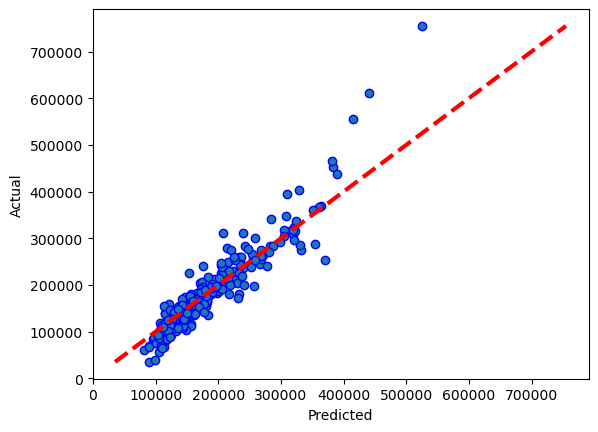

_____________________________________________________________________________________________________
Algorithm: RidgeCV
Label: SalePrice
The RMSE loss for the training set is: 30484.725650076238.
The MAE loss for the training set is: 19064.777223620724.
The R2 loss for the training set is: 0.8788423760791763.

Predicited: 161640.41343974706 | Actual: 154500
Predicited: 336711.11091692734 | Actual: 325000
Predicited: 96934.25736570127 | Actual: 115000
Predicited: 178274.29143590332 | Actual: 159000
Predicited: 337131.91772061435 | Actual: 315500
Predicited: 65319.31672748861 | Actual: 75500
Predicited: 248212.08842734815 | Actual: 311500
Predicited: 149571.42545809317 | Actual: 146000
Predicited: 64063.948386640244 | Actual: 84500
Predicited: 149846.26729394717 | Actual: 135500
Predicited: 148525.63091654226 | Actual: 145000
Predicited: 110203.27013425659 | Actual: 130000
Predicited: 93259.79324516028 | Actual: 81000
Predicited: 224783.6879428168 | Actual: 214000
Predicited: 173062.961

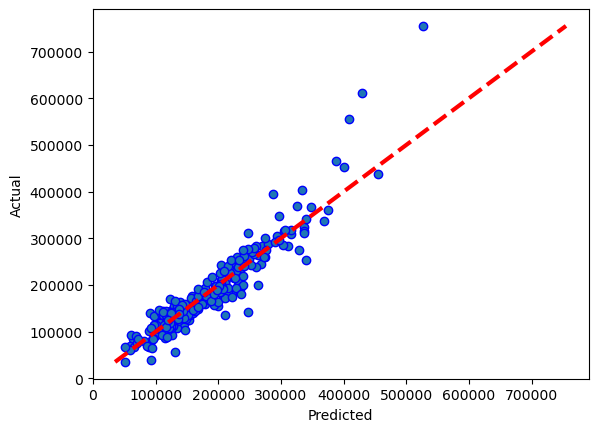

_____________________________________________________________________________________________________
Algorithm: Lasso
Label: SalePrice
The RMSE loss for the training set is: 34477.06727780368.
The MAE loss for the training set is: 19080.417001050395.
The R2 loss for the training set is: 0.8450302978034474.

Predicited: 160886.41789345478 | Actual: 154500
Predicited: 348627.91241266043 | Actual: 325000
Predicited: 86710.23355667735 | Actual: 115000
Predicited: 179044.45951589372 | Actual: 159000
Predicited: 317905.2389118351 | Actual: 315500
Predicited: 68959.97339208261 | Actual: 75500
Predicited: 238729.76108577498 | Actual: 311500
Predicited: 146354.93675338326 | Actual: 146000
Predicited: 63136.16846902843 | Actual: 84500
Predicited: 152573.08971969073 | Actual: 135500
Predicited: 142190.07769976114 | Actual: 145000
Predicited: 104067.92969282274 | Actual: 130000
Predicited: 79474.42407900246 | Actual: 81000
Predicited: 220205.355816863 | Actual: 214000
Predicited: 172860.051872663

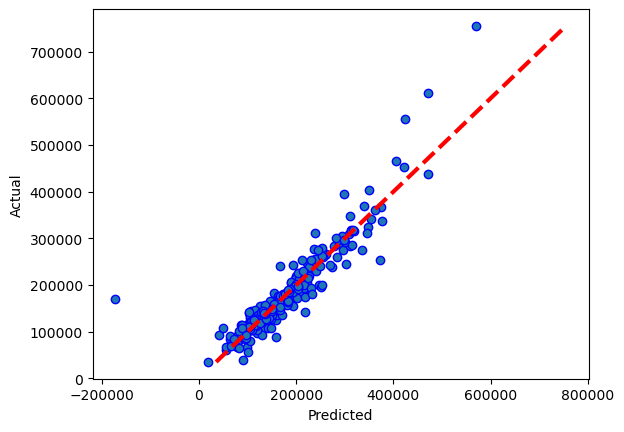

_____________________________________________________________________________________________________
Algorithm: SGDRegressor_elasticnet
Label: SalePrice
The RMSE loss for the training set is: 7.361885340872741e+17.
The MAE loss for the training set is: 6.137604786333089e+17.
The R2 loss for the training set is: -7.065847567392092e+25.

Predicited: 5.1474111330825965e+17 | Actual: 154500
Predicited: 7.808434692154065e+17 | Actual: 325000
Predicited: 5.574472916023066e+17 | Actual: 115000
Predicited: 2.8149550625224275e+17 | Actual: 159000
Predicited: 8.259393911268869e+17 | Actual: 315500
Predicited: 3.632172012593556e+16 | Actual: 75500
Predicited: 1.0164671344588252e+18 | Actual: 311500
Predicited: 9.166514728944818e+16 | Actual: 146000
Predicited: 6.748925482919947e+16 | Actual: 84500
Predicited: 1.074121855324387e+18 | Actual: 135500
Predicited: 3.72102788729082e+17 | Actual: 145000
Predicited: 6.147915136301128e+17 | Actual: 130000
Predicited: 1.1814011783912366e+18 | Actual: 8100

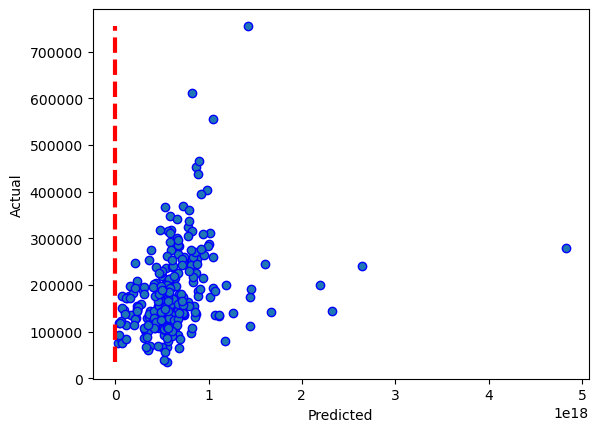

_____________________________________________________________________________________________________
Algorithm: SGDRegressor
Label: SalePrice
The RMSE loss for the training set is: 1.6493962478011634e+16.
The MAE loss for the training set is: 1.1721340493219742e+16.
The R2 loss for the training set is: -3.54679567566687e+22.

Predicited: 3388135580126132.5 | Actual: 154500
Predicited: 3.7580466960414824e+16 | Actual: 325000
Predicited: -6724546749588225.0 | Actual: 115000
Predicited: 8031590979102705.0 | Actual: 159000
Predicited: 1.1767278859512034e+16 | Actual: 315500
Predicited: -7068621432135668.0 | Actual: 75500
Predicited: 2.8541441270521556e+16 | Actual: 311500
Predicited: 1755982745867237.5 | Actual: 146000
Predicited: -6592311087891752.0 | Actual: 84500
Predicited: 1.2358762557471474e+16 | Actual: 135500
Predicited: 3481800053694226.5 | Actual: 145000
Predicited: -233037726232541.7 | Actual: 130000
Predicited: -3099310828191523.0 | Actual: 81000
Predicited: -3970664163941464.

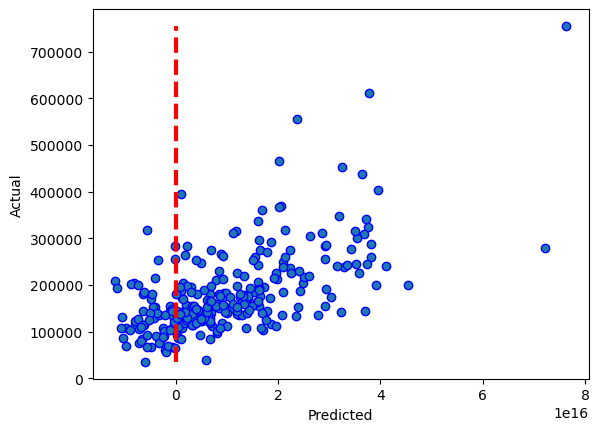

_____________________________________________________________________________________________________
Algorithm: ridge
Label: SalePrice
The RMSE loss for the training set is: 29714.967058916587.
The MAE loss for the training set is: 19108.991372498924.
The R2 loss for the training set is: 0.8848837398225459.

Predicited: 159724.04039164426 | Actual: 154500
Predicited: 343883.9635604947 | Actual: 325000
Predicited: 91057.66064623355 | Actual: 115000
Predicited: 182079.65288636732 | Actual: 159000
Predicited: 327389.87364514545 | Actual: 315500
Predicited: 67202.77300378375 | Actual: 75500
Predicited: 247847.2602687613 | Actual: 311500
Predicited: 147901.46196240053 | Actual: 146000
Predicited: 62831.07114266735 | Actual: 84500
Predicited: 151266.59950637727 | Actual: 135500
Predicited: 144050.04530946145 | Actual: 145000
Predicited: 106668.61277783064 | Actual: 130000
Predicited: 85446.24605222473 | Actual: 81000
Predicited: 227019.14683418104 | Actual: 214000
Predicited: 171616.1133350

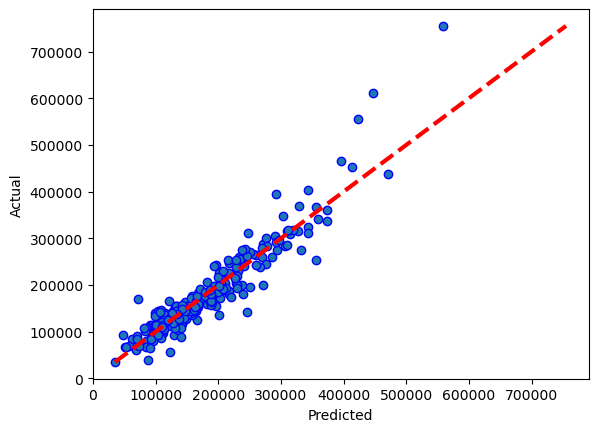

_____________________________________________________________________________________________________
Algorithm: LinearRegression
Label: SalePrice
The RMSE loss for the training set is: 65332.1399332474.
The MAE loss for the training set is: 21105.889801557492.
The R2 loss for the training set is: 0.44353233578801166.

Predicited: 160389.49498882983 | Actual: 154500
Predicited: 343088.5190860196 | Actual: 325000
Predicited: 90063.43069812702 | Actual: 115000
Predicited: 177143.52016082546 | Actual: 159000
Predicited: 320601.11622578977 | Actual: 315500
Predicited: 67876.6194178504 | Actual: 75500
Predicited: 239724.14209917933 | Actual: 311500
Predicited: 146489.93887543818 | Actual: 146000
Predicited: 62417.73170384532 | Actual: 84500
Predicited: 151492.15923310537 | Actual: 135500
Predicited: 140893.66427530255 | Actual: 145000
Predicited: 102377.33393341023 | Actual: 130000
Predicited: 74487.994129322 | Actual: 81000
Predicited: 220266.27490471676 | Actual: 214000
Predicited: 171985

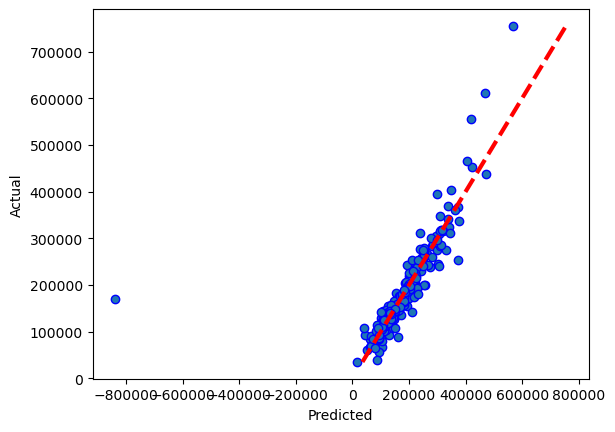

_____________________________________________________________________________________________________
Algorithm: dt
Label: SalePrice
The RMSE loss for the training set is: 40465.58815915241.
The MAE loss for the training set is: 28596.219236645054.
The R2 loss for the training set is: 0.7865196628101911.

Predicited: 145604.20467836258 | Actual: 154500
Predicited: 366304.7 | Actual: 325000
Predicited: 145604.20467836258 | Actual: 115000
Predicited: 179729.53107344633 | Actual: 159000
Predicited: 376452.23255813954 | Actual: 315500
Predicited: 113133.07116104869 | Actual: 75500
Predicited: 201482.6384180791 | Actual: 311500
Predicited: 179729.53107344633 | Actual: 146000
Predicited: 113133.07116104869 | Actual: 84500
Predicited: 146228.76576576577 | Actual: 135500
Predicited: 155780.70967741936 | Actual: 145000
Predicited: 113133.07116104869 | Actual: 130000
Predicited: 113133.07116104869 | Actual: 81000
Predicited: 201482.6384180791 | Actual: 214000
Predicited: 179729.53107344633 | Act

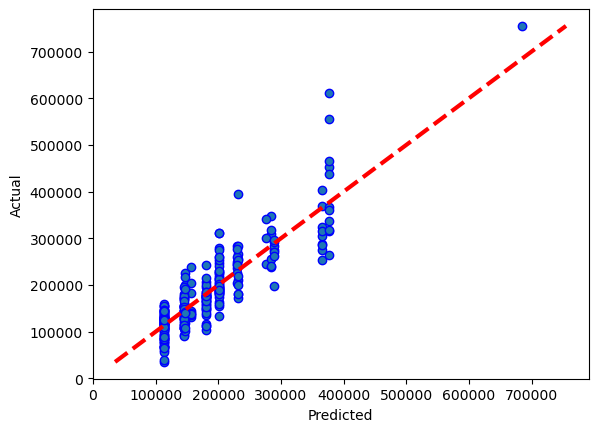

_____________________________________________________________________________________________________
Algorithm: ElasticNet
Label: SalePrice
The RMSE loss for the training set is: 30543.66975683751.
The MAE loss for the training set is: 19016.84184734494.
The R2 loss for the training set is: 0.8783733915592006.

Predicited: 161864.7291162997 | Actual: 154500
Predicited: 335797.79688639625 | Actual: 325000
Predicited: 97091.25327986672 | Actual: 115000
Predicited: 177783.13446890295 | Actual: 159000
Predicited: 337123.7545202634 | Actual: 315500
Predicited: 65289.201307275645 | Actual: 75500
Predicited: 247808.4590508219 | Actual: 311500
Predicited: 149568.17436838045 | Actual: 146000
Predicited: 64139.91687330637 | Actual: 84500
Predicited: 150056.3139974536 | Actual: 135500
Predicited: 148884.51667514816 | Actual: 145000
Predicited: 110539.53319657328 | Actual: 130000
Predicited: 93443.64029447627 | Actual: 81000
Predicited: 224207.5804960378 | Actual: 214000
Predicited: 173233.777578

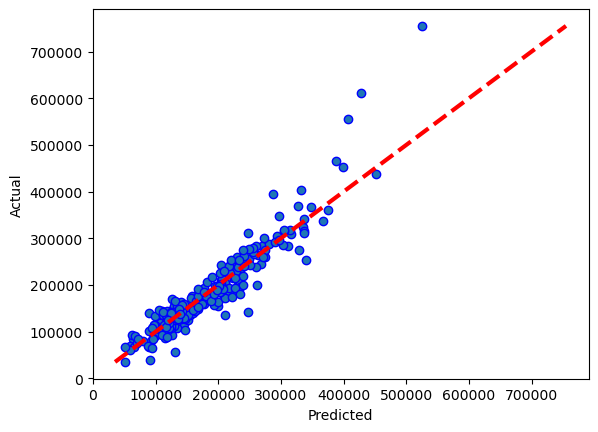

_____________________________________________________________________________________________________
Algorithm: LinearSVR
Label: SalePrice
The RMSE loss for the training set is: 40971.71341087792.
The MAE loss for the training set is: 23874.463398287706.
The R2 loss for the training set is: 0.7811460354515063.

Predicited: 143682.18418057702 | Actual: 154500
Predicited: 296629.068787157 | Actual: 325000
Predicited: 97520.5080206148 | Actual: 115000
Predicited: 155091.6256022162 | Actual: 159000
Predicited: 250439.68620900423 | Actual: 315500
Predicited: 63976.827688637844 | Actual: 75500
Predicited: 199568.28874516225 | Actual: 311500
Predicited: 150241.08372538484 | Actual: 146000
Predicited: 61895.24815086945 | Actual: 84500
Predicited: 138194.66725577935 | Actual: 135500
Predicited: 114653.83212893653 | Actual: 145000
Predicited: 108190.5825273908 | Actual: 130000
Predicited: 136389.60665574137 | Actual: 81000
Predicited: 205105.9979230964 | Actual: 214000
Predicited: 192924.481504

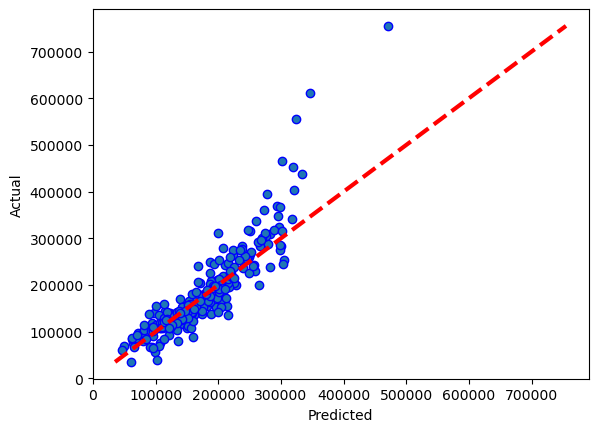

_____________________________________________________________________________________________________
Algorithm: knn
Label: SalePrice
The RMSE loss for the training set is: 47687.94528329281.
The MAE loss for the training set is: 28140.296575342465.
The R2 loss for the training set is: 0.7035145489364649.

Predicited: 140980.0 | Actual: 154500
Predicited: 309806.0 | Actual: 325000
Predicited: 115900.0 | Actual: 115000
Predicited: 156486.8 | Actual: 159000
Predicited: 234960.0 | Actual: 315500
Predicited: 87600.0 | Actual: 75500
Predicited: 199257.0 | Actual: 311500
Predicited: 160400.0 | Actual: 146000
Predicited: 88200.0 | Actual: 84500
Predicited: 150557.0 | Actual: 135500
Predicited: 125940.0 | Actual: 145000
Predicited: 124700.0 | Actual: 130000
Predicited: 131980.0 | Actual: 81000
Predicited: 221578.6 | Actual: 214000
Predicited: 182070.0 | Actual: 181000
Predicited: 129700.0 | Actual: 134500
Predicited: 183370.0 | Actual: 183500
Predicited: 126300.0 | Actual: 135000
Predicited: 1

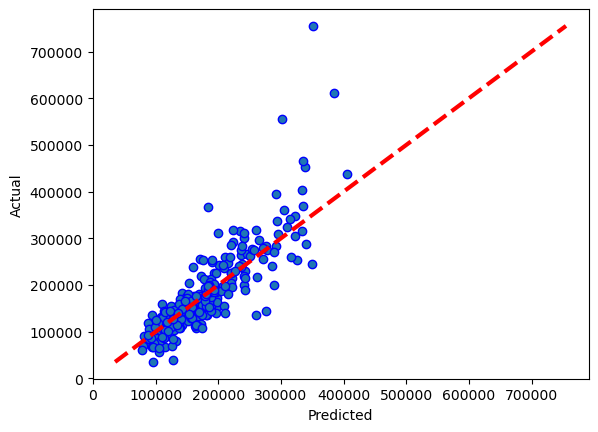

_____________________________________________________________________________________________________
Algorithm: ElasticNetCV
Label: SalePrice
The RMSE loss for the training set is: 41771.60953797787.
The MAE loss for the training set is: 25319.682546402062.
The R2 loss for the training set is: 0.7725171894569052.

Predicited: 137131.27181687485 | Actual: 154500
Predicited: 305410.9619360429 | Actual: 325000
Predicited: 110772.7689208528 | Actual: 115000
Predicited: 165626.11126021878 | Actual: 159000
Predicited: 256756.15742370533 | Actual: 315500
Predicited: 69109.74681153335 | Actual: 75500
Predicited: 193305.72275140567 | Actual: 311500
Predicited: 161581.309517115 | Actual: 146000
Predicited: 65553.11536230065 | Actual: 84500
Predicited: 140323.78622349456 | Actual: 135500
Predicited: 125260.11750585574 | Actual: 145000
Predicited: 113915.48108136712 | Actual: 130000
Predicited: 165792.5874033235 | Actual: 81000
Predicited: 206257.76911322493 | Actual: 214000
Predicited: 190157.75

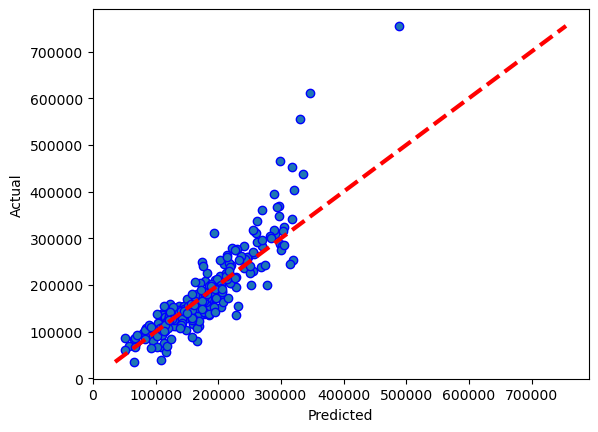

_____________________________________________________________________________________________________
Algorithm: ARDRegression
Label: SalePrice
The RMSE loss for the training set is: 30574.81124755573.
The MAE loss for the training set is: 18449.216375126347.
The R2 loss for the training set is: 0.8781252507947144.

Predicited: 150967.52058022842 | Actual: 154500
Predicited: 352183.9910365273 | Actual: 325000
Predicited: 106062.94150992564 | Actual: 115000
Predicited: 165576.16993159894 | Actual: 159000
Predicited: 331247.83993567247 | Actual: 315500
Predicited: 65098.15610562998 | Actual: 75500
Predicited: 237799.8278724741 | Actual: 311500
Predicited: 138916.39282002032 | Actual: 146000
Predicited: 60305.92807782162 | Actual: 84500
Predicited: 142849.76549613872 | Actual: 135500
Predicited: 157657.9905555962 | Actual: 145000
Predicited: 122821.99455608625 | Actual: 130000
Predicited: 95493.01885586139 | Actual: 81000
Predicited: 227381.0647703926 | Actual: 214000
Predicited: 177456.7

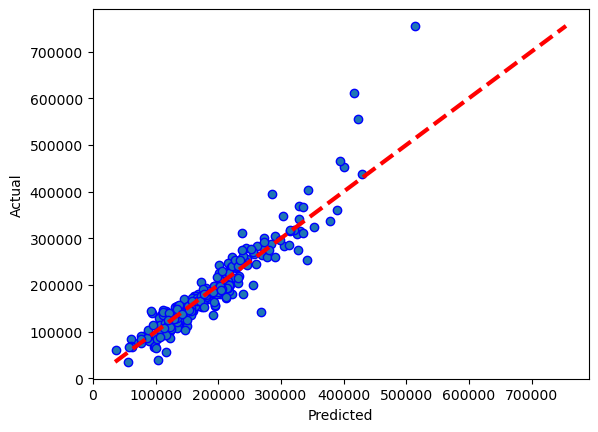

_____________________________________________________________________________________________________
Algorithm: SVR
Label: SalePrice
The RMSE loss for the training set is: 74347.12451645435.
The MAE loss for the training set is: 58288.416488060524.
The R2 loss for the training set is: 0.27936638226860777.

Predicited: 101116.41897967143 | Actual: 154500
Predicited: 244272.84554581964 | Actual: 325000
Predicited: 41668.63615633458 | Actual: 115000
Predicited: 118197.12884421942 | Actual: 159000
Predicited: 196466.45823802854 | Actual: 315500
Predicited: 34946.902690929535 | Actual: 75500
Predicited: 126051.06740922378 | Actual: 311500
Predicited: 119682.51878360286 | Actual: 146000
Predicited: 31237.73877510661 | Actual: 84500
Predicited: 66417.42549815375 | Actual: 135500
Predicited: 68647.82458822071 | Actual: 145000
Predicited: 58796.48936194266 | Actual: 130000
Predicited: 45537.89238499044 | Actual: 81000
Predicited: 150473.7765635076 | Actual: 214000
Predicited: 145978.1332484417

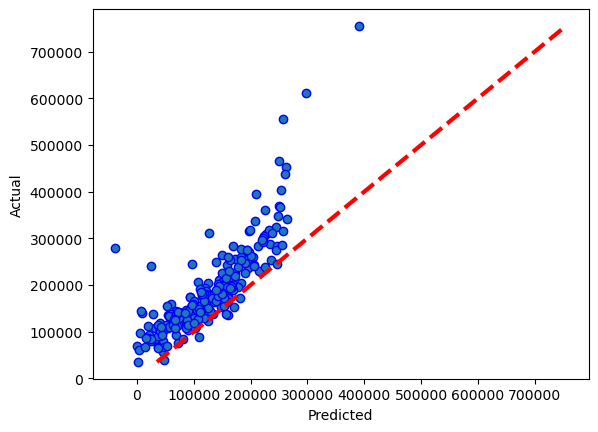

In [32]:
evaluation(input_df_train, output_df_train, input_df_test, output_df_test, options, algorithms, _scoring)